<a href="https://colab.research.google.com/github/Giuseppe31-s/Desafio-Cientista-de-Dados-oncase/blob/main/Desafio_oncase_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip regression_data.zip

Archive:  regression_data.zip
   creating: regression_data/
  inflating: regression_data/regression_test.csv  
  inflating: regression_data/regression_train.csv  


# Limpeza do dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings("ignore")

In [ ]:

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
df_train = pd.read_csv("/content/regression_data/regression_train.csv")

In [ ]:
df_train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


Nosso feature target está com muitos valores faltantes, vamos ajustar isso.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


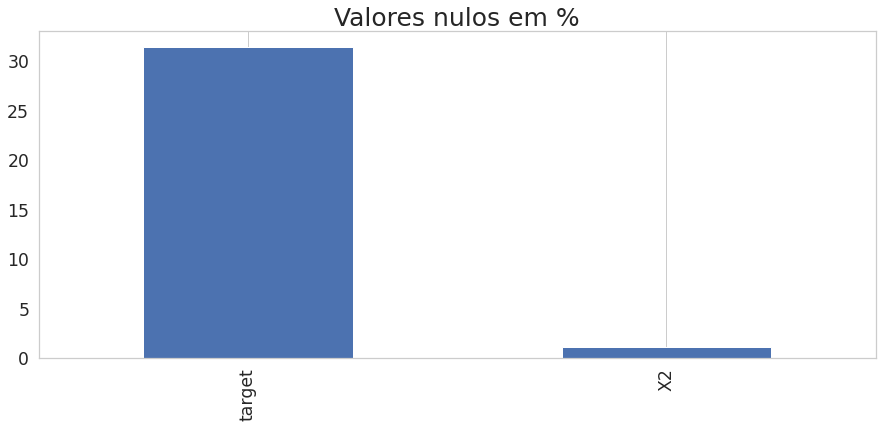

In [ ]:

  plt.figure(figsize = (15,6))
  ((df_train.isna().sum()[df_train.isna().sum()>0]/df_train.shape[0]) * 100).plot(kind = 'bar')
  plt.grid(axis = 'y')
  plt.title('Valores nulos em %', fontsize = 25);

##Lidando com valores faltantes

No caso do target, vamos apenas remover os valores faltantes.

Em relação ao X2, várias medidas podem ser tomadas, por exemplo:

> Preenchendo valores com média

> Preenchendo valores com moda

> Preenchendo valores com mediana

> Preenchendo valores com interpolação

Vamos remover os valores faltantes do target e analisar a nossa variável X2 para podermos preencher os valores faltantes da melhor forma.

In [ ]:
df_train.dropna(subset = ['target'], inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 1 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      715 non-null    float64
 2   X2      715 non-null    float64
 3   X3      715 non-null    float64
 4   X4      715 non-null    float64
 5   X5      715 non-null    float64
 6   X6      715 non-null    int64  
 7   X7      715 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 50.3 KB


## Estatística descritiva



In [ ]:
df_train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,3.367040,1.541895,50.089566,2.330196,-64.986930,4.576224,3.623453
std,1593.201095,2.830287,3.236113,4.067153,2.498788,9.524299,3.237256,7.604867
min,0.062551,-4.079909,-3.786653,38.035456,0.009815,-121.450423,0.000000,-8.898633
25%,230.632308,1.510589,-0.973832,47.423904,0.597640,-69.085396,0.000000,-2.288504
50%,808.374368,3.354627,1.056399,50.137764,1.526100,-65.078252,5.000000,2.482539
75%,1849.754221,5.127394,3.448100,52.871490,3.143906,-61.117380,8.000000,8.103036
max,10382.469480,12.380693,12.926106,62.972372,18.813009,53.919202,8.000000,30.376348



## Outliers

1.    Método IQR: Neste método, você calcula a amplitude interquartil (IQR) dos seus dados, que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Qualquer valor que esteja fora da faixa definida por Q1 - 1,5 x IQR e Q3 + 1,5 x IQR é considerado um outlier.

2.    Análise univariada: Neste método, você realiza uma análise univariada dos seus dados, examinando a distribuição de cada variável individualmente. Valores que estão fora do intervalo de confiança de 95% (calculado a partir da média e do desvio padrão) são considerados outliers.

3. Visualização de dados: Outra maneira de identificar outliers é através de visualizações dos dados, como gráficos de dispersão ou box plots. Essas visualizações podem ajudar a identificar pontos que estão muito distantes dos outros pontos em seus dados.

**Há muitas formas de remover outlier, mas acredito que essas sejam as mais simples e eficiêntes nesse contexto.**


Vamos utilizar os **métodos IQR e Boxplot** pois são eficientes e muito simples de serem utilizados.

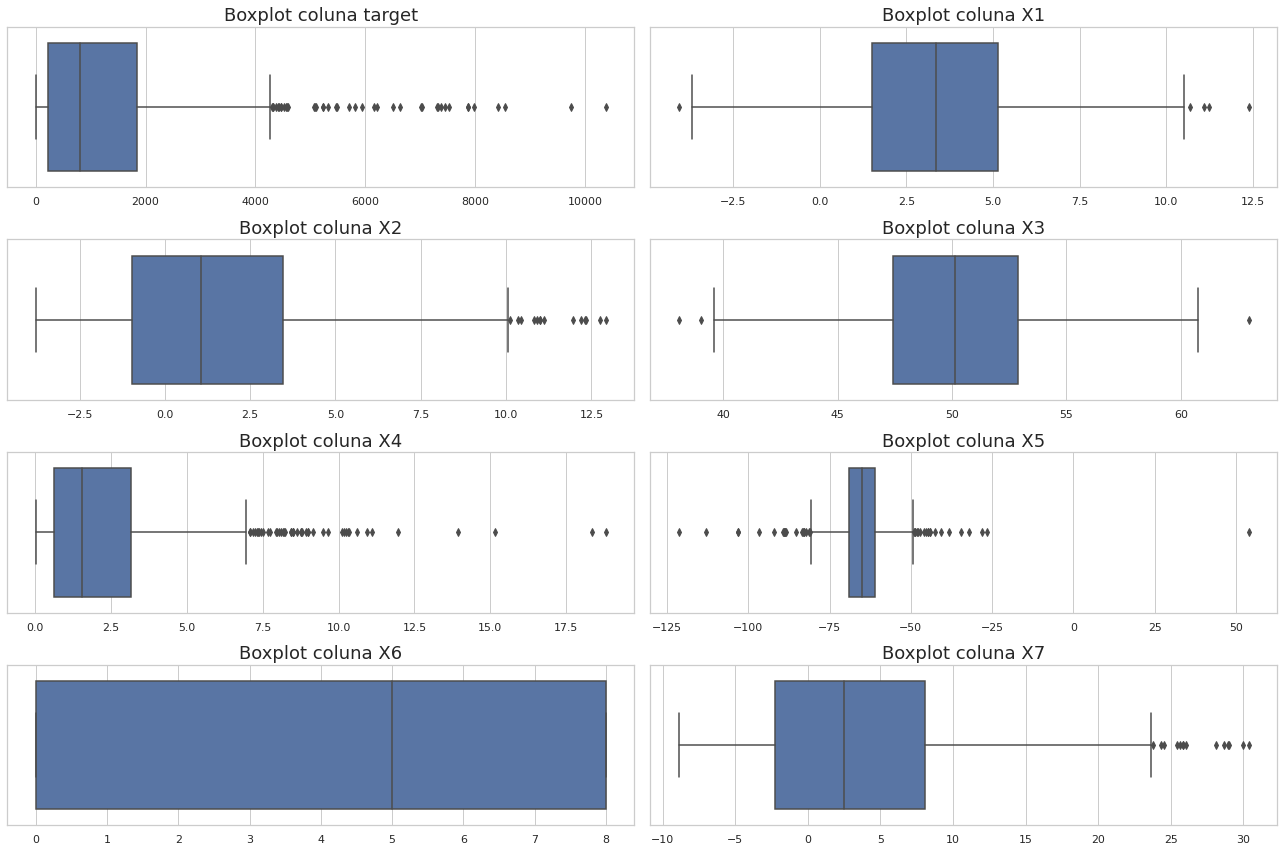

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(4, 2, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(df_train.columns):
    sns.boxplot(x=df_train[col], ax=axs[i])
    axs[i].set_title(f'Boxplot coluna {col}', fontsize = 18)
    axs[i].set_xlabel("")

plt.tight_layout()
plt.show()


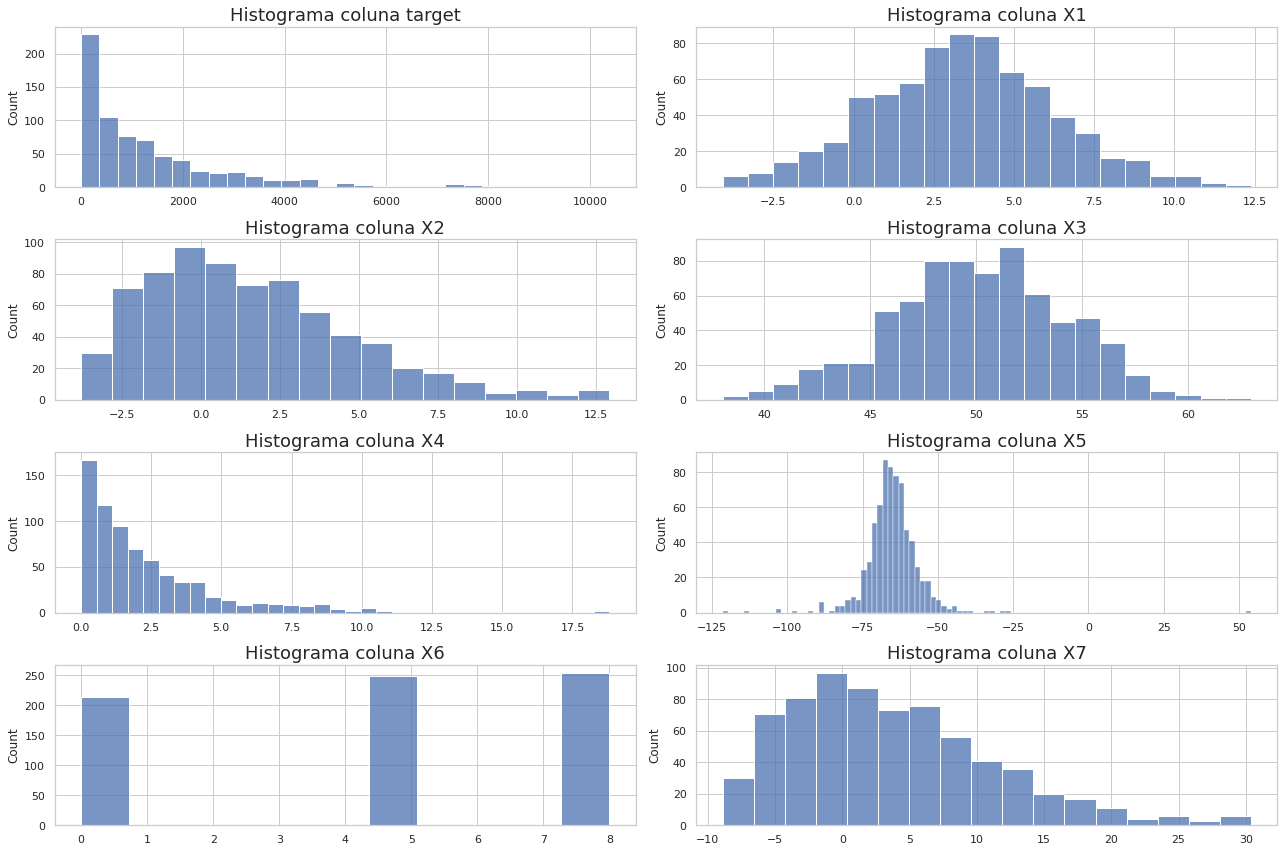

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(df_train.columns):
    sns.histplot(x=df_train[col], ax=axs[i])
    axs[i].set_title(f'Histograma coluna {col}', fontsize = 18)
    axs[i].set_xlabel("")

plt.tight_layout()
plt.show()


Aqui a gente entra no primeiro conflito, um trade off entre qualidade e quantidade. Quanto de informação a gente perde para remover os outlier.

In [ ]:
from scipy.stats import iqr

for i in df_train.columns:
  IQR = iqr(df_train[f'{i}'])
  lower_threshold = np.quantile(df_train[f'{i}'], 0.25) - 1.5 * IQR
  upper_threshold = np.quantile(df_train[f'{i}'], 0.75) + 1.5 * IQR
  noutlier = df_train[(df_train[f'{i}']> upper_threshold) | (df_train[f'{i}'] <lower_threshold)].shape[0]
  amostra = df_train.shape[0] 
  perdaden = round((noutlier / amostra) * 100,2)
  print(f'Variável {i} contém {perdaden} % de valores considerados outlier, ou seja, {noutlier} instâncias vão ser descartadas')
  print('\n')



Variável target contém 5.73 % de valores considerados outlier, ou seja, 41 instâncias vão ser descartadas


Variável X1 contém 0.7 % de valores considerados outlier, ou seja, 5 instâncias vão ser descartadas


Variável X2 contém 1.96 % de valores considerados outlier, ou seja, 14 instâncias vão ser descartadas


Variável X3 contém 0.42 % de valores considerados outlier, ou seja, 3 instâncias vão ser descartadas


Variável X4 contém 6.43 % de valores considerados outlier, ou seja, 46 instâncias vão ser descartadas


Variável X5 contém 5.59 % de valores considerados outlier, ou seja, 40 instâncias vão ser descartadas


Variável X6 contém 0.0 % de valores considerados outlier, ou seja, 0 instâncias vão ser descartadas


Variável X7 contém 1.96 % de valores considerados outlier, ou seja, 14 instâncias vão ser descartadas




Na minha opinião, vale sim remover apenas 5,73% das instâncias para ganhar qualidade, nossos modelos vão ganhar mais precisão na medida que não vão precisar lidar com valores muitos absurdos.

Vamos começar removendo apenas os outlier do target que é a variável mais importante.

In [ ]:


IQR = iqr(df_train['target'])
lower_threshold = np.quantile(df_train['target'], 0.25) - 1.5 * IQR
upper_threshold = np.quantile(df_train['target'], 0.75) + 1.5 * IQR

In [ ]:
df_train = df_train[(df_train['target']< upper_threshold) & (df_train['target'] >lower_threshold)]
df_train

,target,X1,X2,X3,X4,X5,X6,X7
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680
5,750.197635,1.090232,1.256970,50.290722,1.477950,-58.637657,5,2.953880
6,1042.939629,1.145275,2.354394,51.601926,3.968927,-60.466758,5,5.532825
...,...,...,...,...,...,...,...,...
1035,114.606339,-0.496554,-1.693121,55.365904,0.280572,-66.641446,0,-3.978835
1036,1459.419250,0.588939,3.120751,51.632211,0.427576,-72.665728,8,7.333765
1038,54.530919,0.619207,-1.925819,48.168606,1.357223,-65.385243,8,-4.525675
1039,1636.535078,4.548172,2.886253,47.775525,1.278439,-56.312543,8,6.782694


## Verificando os valores sem outlier

Ainda existem alguns outlier como na coluna X5, porém outras colunas, como target e X4 seguem uma distribuição exponencial, e nesse sentido, demoraria muito para remover todos os outlier desses conjuntos, pois é da própria natureza da distribuição. Nesses casos, pode não ser apropriado remover todos os outliers, pois eles fazem parte da distribuição e podem ser importantes para entender o comportamento dos dados.

In [ ]:
df_train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,1060.912167,3.160231,1.069295,50.085983,2.341029,-64.970202,4.557864,2.512844
std,1040.006301,2.724023,2.647588,4.032691,2.531992,9.649874,3.219149,6.221833
min,0.062551,-4.079909,-3.786653,38.035456,0.009815,-121.450423,0.000000,-8.898633
25%,205.834316,1.299826,-1.059825,47.447844,0.596188,-69.088139,0.000000,-2.490588
50%,723.622723,3.177204,0.830153,50.074441,1.497035,-65.076223,5.000000,1.950859
75%,1623.442997,4.954472,2.854017,52.760238,3.145362,-61.086176,8.000000,6.706939
max,4264.254603,11.230301,7.814993,62.972372,18.813009,53.919202,8.000000,18.365234


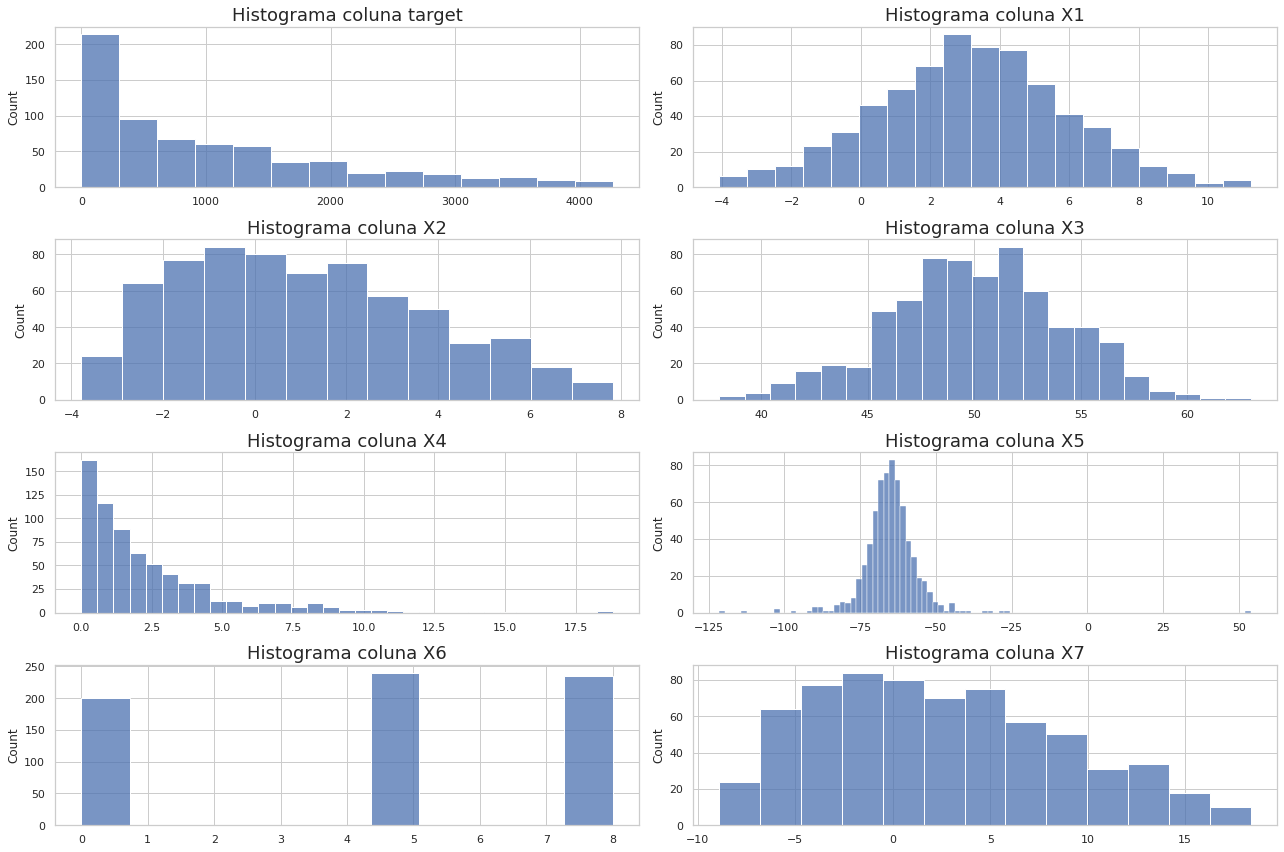

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(df_train.columns):
    sns.histplot(x=df_train[col], ax=axs[i])
    axs[i].set_title(f'Histograma coluna {col}', fontsize = 18)
    axs[i].set_xlabel("")

plt.tight_layout()
plt.show()

# Visualizando como as variáveis se comportam entre si

Removendo a variável X6 por quê ela se comporta como categórica.

Deu para visualizar que existem algumas variáveis independentes que estão bem correlacionadas com a nossa variável dependente, por exemplo, X2 e X7 estão bem correlacionadas. Vamos utilizar uma matriz de correlação pra visualizar isso de maneira mais clara.

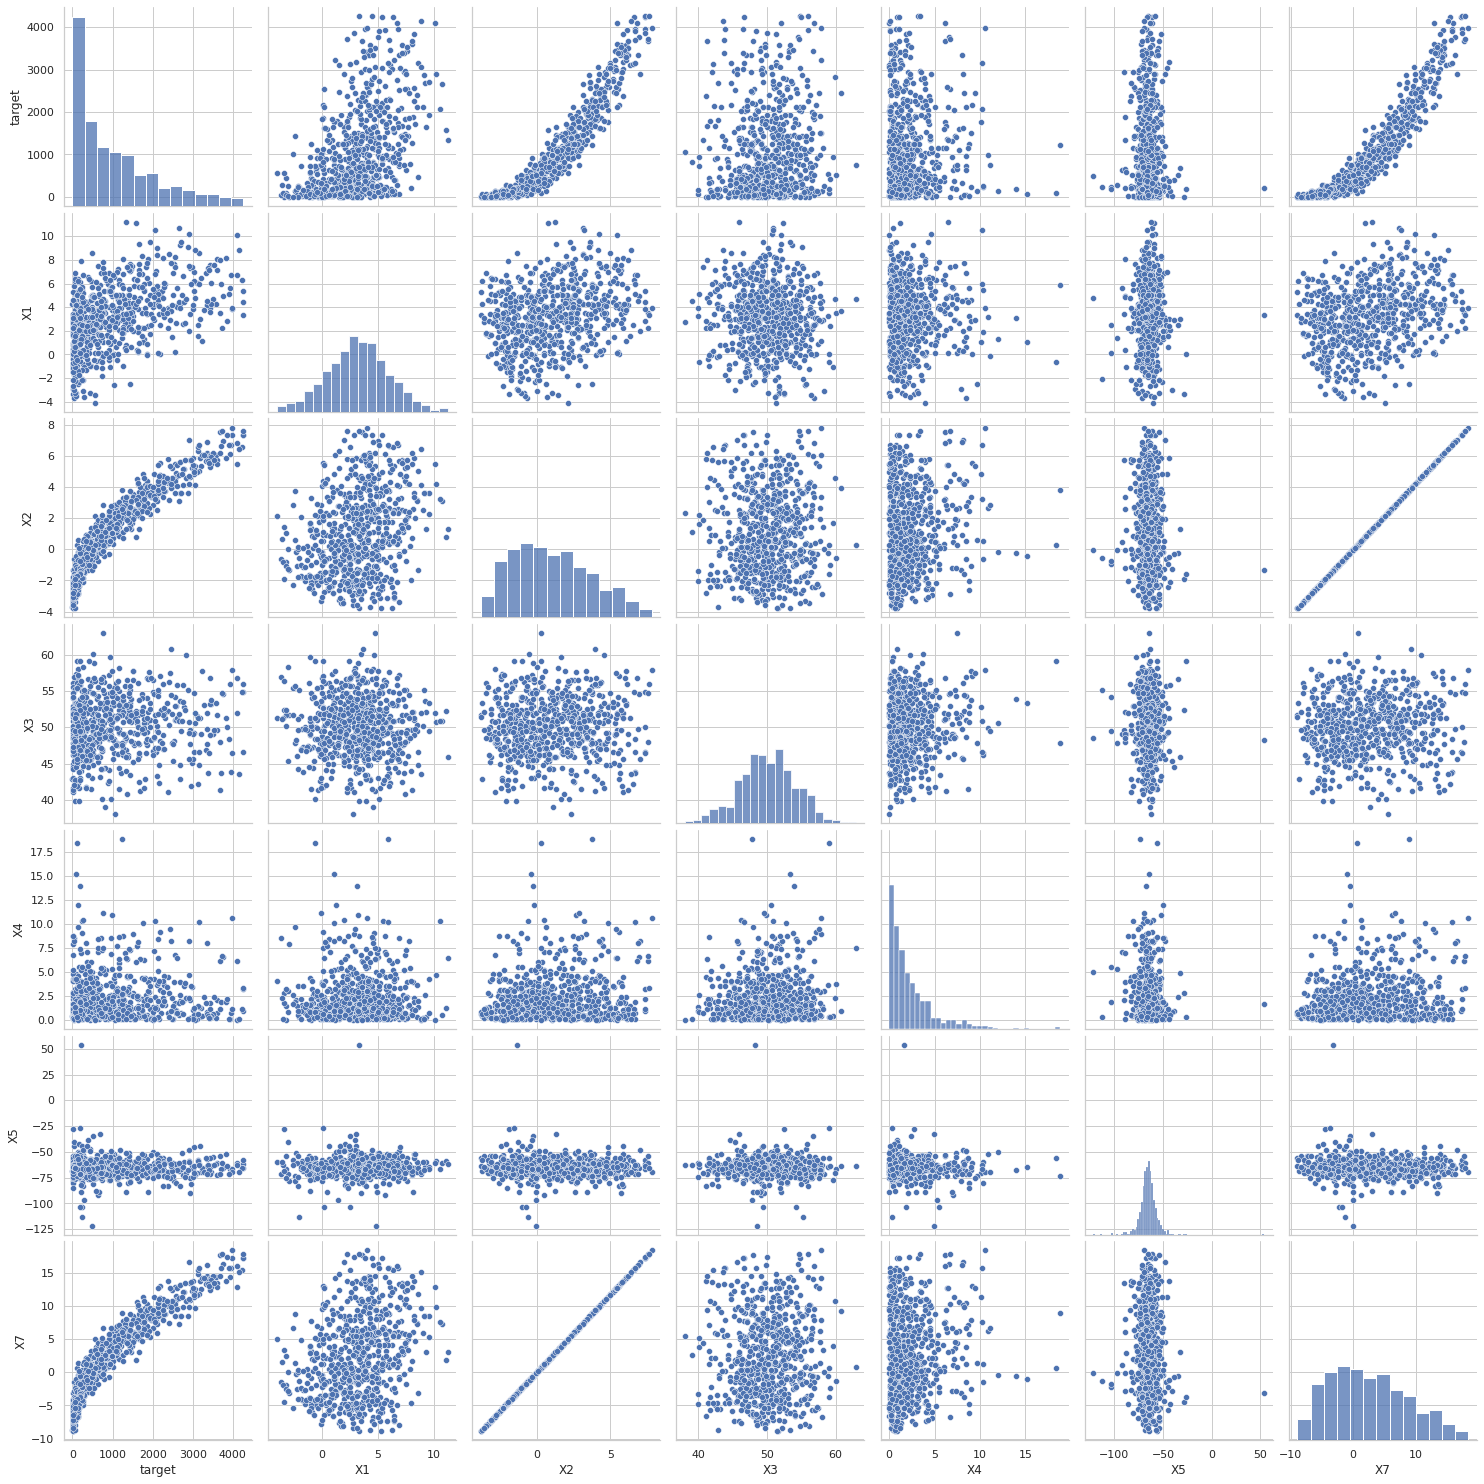

In [ ]:
sns.pairplot(df_train.drop(columns = ['X6']), aspect=1,height = 3 );

## Matriz de correlação



*    Correlação de Pearson: É uma medida que avalia a relação linear entre duas variáveis contínuas. A correlação varia de -1 (correlação perfeita negativa) a +1 (correlação perfeita positiva), sendo que 0 indica nenhuma correlação. A correlação de Pearson pode ser útil para avaliar a relação entre variáveis como idade e renda, por exemplo.

*    Correlação de Spearman: É uma medida que avalia a relação monótona entre duas variáveis. A correlação varia de -1 (correlação perfeita negativa) a +1 (correlação perfeita positiva), sendo que 0 indica nenhuma correlação. A correlação de Spearman é especialmente útil para avaliar a relação entre variáveis ordinais, como a posição de chegada em uma corrida e o tempo de corrida, por exemplo.

Existem outras medidas de correlação, mas essas são as mais comuns e utilizadas.


Visualmente, da para perceber que as nossas relações entre as variáveis não são lineares, salvo alguns casos. Logo, vou usar a **correlação de spearman**.

In [ ]:
corr = df_train.corr('spearman')
corr

,target,X1,X2,X3,X4,X5,X6,X7
target,1.000000,0.484615,0.964264,0.118619,0.014805,-0.072233,0.057588,0.964264
X1,0.484615,1.000000,0.289124,-0.046605,0.004094,0.018937,0.047031,0.289124
X2,0.964264,0.289124,1.000000,0.057912,0.100737,-0.089033,0.046781,1.000000
X3,0.118619,-0.046605,0.057912,1.000000,0.066646,0.001979,-0.003533,0.057912
X4,0.014805,0.004094,0.100737,0.066646,1.000000,-0.024205,-0.016549,0.100737
X5,-0.072233,0.018937,-0.089033,0.001979,-0.024205,1.000000,-0.046931,-0.089033
X6,0.057588,0.047031,0.046781,-0.003533,-0.016549,-0.046931,1.000000,0.046781
X7,0.964264,0.289124,1.000000,0.057912,0.100737,-0.089033,0.046781,1.000000


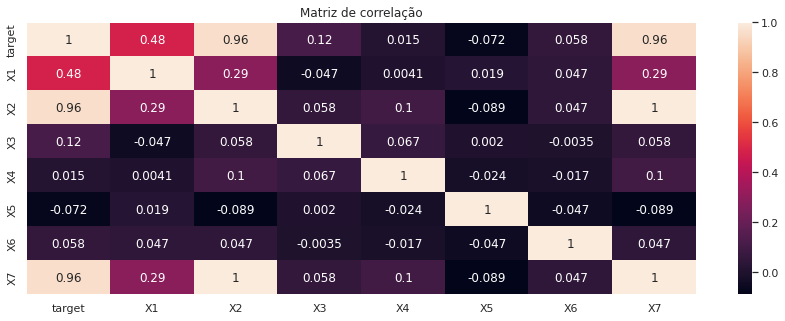

In [ ]:
plt.title('Matriz de correlação')
sns.heatmap(corr,annot=True);

As variáveis X2 e X7 tem 1 de correlação e para evitar multicolinearidade, vamos excluir a variável X7 ou X2. Nesse caso vamos remover o X7.

In [ ]:
df_train.drop('X7', axis = 1, inplace = True)

# Criação do modelo

Agora temos duas escolhas fundamentais: usar um modelo paramétrico ou não paramétrico.

Modelos paramétricos

> Regressão Linear

> Regressão Polinomial

Modelos não paramétricos

> DecisionTreeRegressor

> RandomForestRegressor

Os modelos paramétricos são aqueles que assumem uma distribuição de probabilidade específica para as variáveis do modelo. Em muitos casos, a distribuição normal é escolhida devido à sua simplicidade e propriedades estatísticas bem conhecidas. No entanto, nem sempre é necessário que os dados sejam normalmente distribuídos para se utilizar um modelo paramétrico.

Por outro lado, os modelos não paramétricos não exigem uma distribuição específica para as variáveis do modelo. Eles geralmente são mais flexíveis e podem ser usados em uma ampla variedade de situações. No entanto, eles podem exigir mais dados para ter o mesmo nível de precisão que um modelo paramétrico.

# Pré-Processamento

Como a escala dos nossos dados é um pouco diferente entre as variáveis, vamos normalizar os nossos dados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

In [ ]:
y = df_train['target'].values

#Modelos paramétricos

Para esses modelos, vou selecionar apenas 4 variáveis, sendo elas X1, X2, X3, X5 e X6.

In [ ]:
X = df_train.drop(['target','X4'],axis = 1)


In [ ]:
X = pd.DataFrame(columns = df_train.drop(['target','X4'],axis = 1).columns,data =  X)

Separando os nossos dados para treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
X_train_scalar = scaler.fit_transform(X_train)

In [ ]:
X_test_scalar = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(columns = df_train.drop(['target','X4'],axis = 1).columns,data =  X_train_scalar)
X_test = pd.DataFrame(columns = df_train.drop(['target','X4'],axis = 1).columns,data =  X_test_scalar)

## Regressão linear

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms


#Regressão linear

## Modelo Scipy

O modelo do Scipy não tem ferramentas como o gradiente descendente para realizar a regressão linear. No entanto, por ser uma biblioteca mais estatística, o Scipy fornece muitas informações que o Scikit-learn não possui. Por exemplo, o Scipy fornece o valor p (P-valor) para cada coeficiente da regressão, que pode ser usado para avaliar a significância estatística do modelo. O valor p indica a probabilidade de obter um coeficiente tão extremo quanto o observado, se a hipótese nula (H0) for verdadeira. Se o valor p for menor que o nível de significância estatística (geralmente definido como 0,05), podemos rejeitar a hipótese nula e concluir que o coeficiente é estatisticamente significativo.

Em resumo, o valor p fornece uma medida da probabilidade de que o coeficiente de regressão observado seja devido ao acaso, em vez de uma relação real entre as variáveis. Um valor p pequeno (por exemplo, menor que 0,05) indica que a probabilidade de que o coeficiente seja devido ao acaso é baixa, e, portanto, o coeficiente é considerado estatisticamente significativo. Por outro lado, um valor p grande indica que o coeficiente pode ser devido ao acaso e, portanto, não é considerado estatisticamente significativo.

Logo, as variáveis X3 não tem significância estatística e vai ser descartada do nosso modelo.

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train) # modelo de regressão linear sem gradiente descendente

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1413.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          8.94e-305
Time:                        22:40:41   Log-Likelihood:                -3802.4
No. Observations:                 539   AIC:                             7617.
Df Residuals:                     533   BIC:                             7643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1507.5585     99.392    -15.168      0.0

### Criando modelo sem as variáveis excluídas

Os resultados não melhoraram, ficou exatamente o mesmo com menos variáveis e pelo princípio da parcimônia ele é melhor.

In [ ]:
X_train = X_train.drop(columns = 'X3')
X_test = X_test.drop(columns = 'X3')

In [ ]:

model = sm.OLS(y_train, X_train) # modelo de regressão linear 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1677.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.23e-300
Time:                        22:40:41   Log-Likelihood:                -3815.8
No. Observations:                 539   AIC:                             7642.
Df Residuals:                     534   BIC:                             7663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1315.4140     94.581    -13.908      0.0

Visualmente o nosso modelo ficou bom, vamos usar as métricas de validação para podermos mensurar isso.

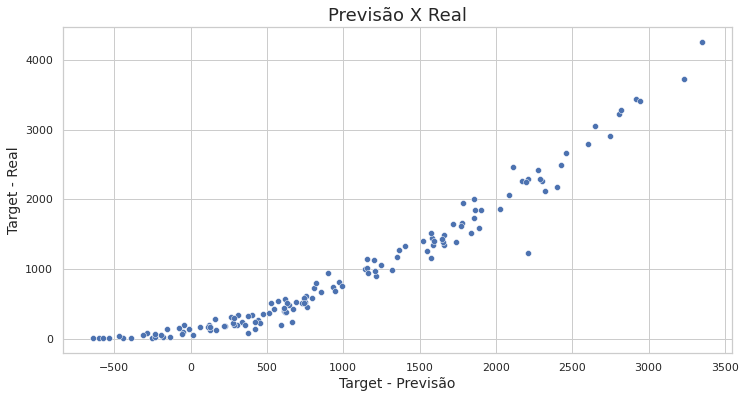

In [ ]:
predict = results.predict(X_test)
ax = sns.scatterplot(x=predict, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Target - Previsão', fontsize=14)
ax.set_ylabel('Target - Real', fontsize=14)
ax;



## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade). Como a nossa variável dependente não segue uma distribuição normal, não faz muito sentido utilizar esse método. Apenas estou utilizando para ver alguns resultados curiosos.

In [ ]:
residuo = y_test - predict

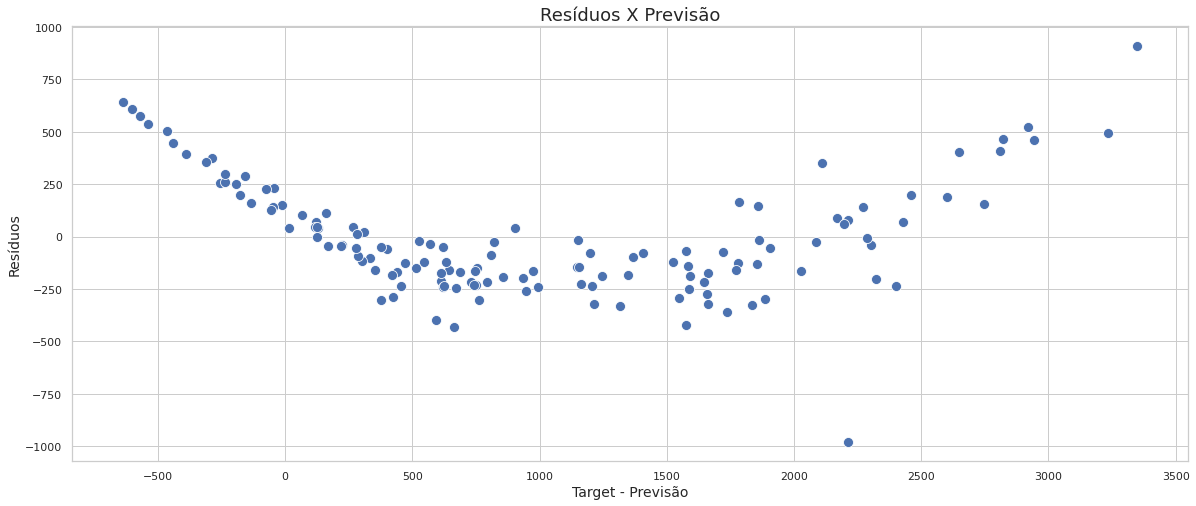

In [ ]:
# S aumenta o tamanho das bolinhas, s de size
ax = sns.scatterplot(x=predict, y=residuo, s=100)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Target - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width = '800px' src = 'https://raw.githubusercontent.com/Giuseppe31-s/Curso_alura/main/regressaolinear/var_u.jpg'>

Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

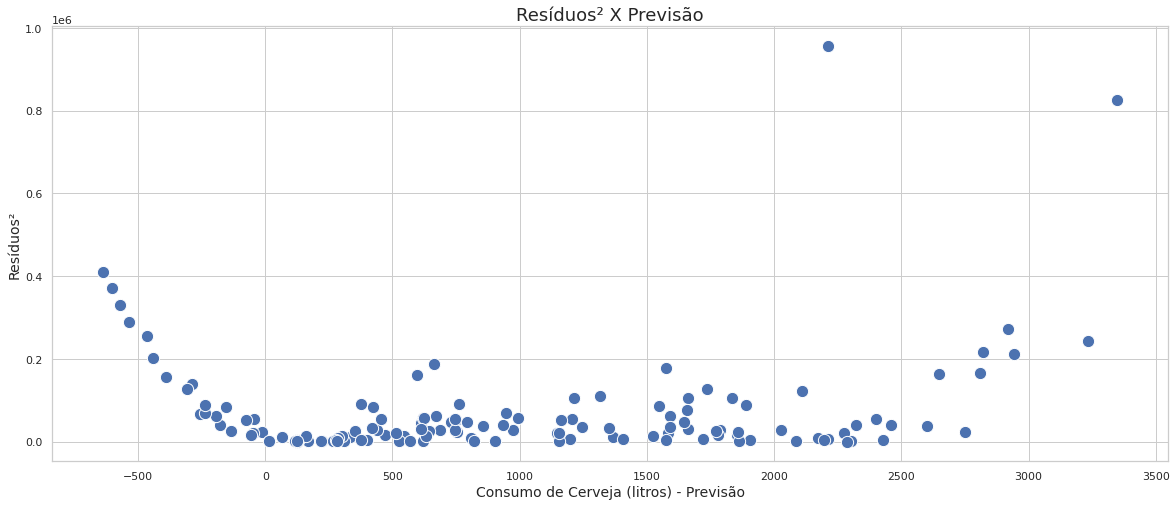

In [ ]:
ax = sns.scatterplot(x=predict, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos² X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax;

##Heterocedasticidade

Quando a heterocedasticidade está presente, os valores previstos pelo modelo podem ter uma variabilidade maior ou menor do que a realidade, dependendo do valor da variável independente. Isso pode afetar a precisão das previsões, especialmente em relação aos valores extremos.

Para lidar com a heterocedasticidade, existem algumas abordagens que podem ser adotadas. Uma delas é transformar as variáveis em escala logarítmica ou utilizar outras técnicas de transformação para reduzir a variabilidade dos erros.

Outra abordagem é utilizar modelos de regressão robustos, que levam em consideração a heterocedasticidade e permitem ajustar os parâmetros do modelo para lidar com a variabilidade dos erros.

## Métricas de validação

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente $y_{real} - y_{previsão}$

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram "vistos" pelo modelo).


### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$


#### MAE - MEAN ABSOLUTE ERROR - (ERRO MÉDIO ABSOLUTO)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso, no caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo

####MSE - MEAN SQUARED ERROR - (ERRO QUADRÁTICO MÉDIO)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

####RMSE - ROOT MEAN SQUARED ERROR - (ERRO QUADRÁTICO MÉDIO DA RAIZ)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo (R$/m3), ela é muito usada porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

####MAPE - MEAN ABSOLUTE PERCENTAGE ERROR - (ERRO PERCENTUAL MÉDIO ABSOLUTO)

Essa é outra métrica interessante de ser usada, geralmente usada em relatórios gerenciais, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um produto X com o erro percentual de um produto Y.

O cálculo dessa métrica pega o valor absoluto do erro dividido pelo preço real e posteriormente é calculada a média:

Vamos validar a nossa regressão linear sem gradiente descendente e depois usando o gradiente descendente.

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, r2_score

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    r2 = r2_score(orig, prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [r2, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['R2','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

Essas métricas mostram que o nosso modelo não soube lidar muito bem com os outliers.

In [ ]:
check_erro(y_test, predict,'Regressão Linear','Métricas')

,Regressão Linear
Métricas,
R2,0.922309
MSE,70923.436930
RMSE,266.314545
MAE,208.403699
MAPE,1316.558125


## Regressão linear com gradiente descendente

In [ ]:
from sklearn.linear_model import SGDRegressor

lr = SGDRegressor(loss='squared_loss', max_iter=15000, learning_rate='constant')

# Treinando o modelo nos dados de treino
lr.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = lr.predict(X_test)

O modelo com gradiente descendente conseguiu se ajustar melhor aos nossos dados. Lidando melhor com outlier, isso pode ser observado através do MSE.

In [ ]:
check_erro(y_test, y_pred,'Regressã linear com gradiente descendete','Métricas')

,Regressã linear com gradiente descendete
Métricas,
R2,0.917991
MSE,74865.167485
RMSE,273.614999
MAE,218.360071
MAPE,1240.378452


# Regressão polinomial com gradiente descendente

Vamos pegar os nossos dados e aplicar o polinomial para depois escalar novamente entre 0 e 1.

In [ ]:
X = df_train.drop(columns = ['target','X3','X4'])

In [ ]:
X = scaler.fit_transform(df_train.drop(['target','X4','X3'],axis = 1))
y = df_train['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_min_max_train = scaler.fit_transform(X_poly_train)
X_poly_min_max_test = scaler.transform(X_poly_test)




In [ ]:
from sklearn.linear_model import SGDRegressor

pr = SGDRegressor(loss='squared_loss', max_iter=1000, learning_rate='constant', eta0=0.001)

# Treinando o modelo nos dados de treino
pr.fit(X_poly_min_max_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = pr.predict(X_poly_min_max_test)

Nosso modelo polinomial ficou ainda melhor, o que era esperado, pois a nossa relação entre a variável dependente e as variáveis independentes não é linear.

In [ ]:
check_erro(y_test, y_pred,'Regressã polinomial com gradiente descendete','Métricas')

,Regressã polinomial com gradiente descendete
Métricas,
R2,0.968086
MSE,29133.635518
RMSE,170.685780
MAE,123.163653
MAPE,598.291234


     

#Modelos não paramétricos

## DecisionTreeRegressor

Árvores de decisão (DTs) são um método de aprendizado supervisionado não paramétrico utilizado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável-alvo, aprendendo regras de decisão simples inferidas a partir das características dos dados. Uma árvore pode ser vista como uma aproximação constante por partes.

Vamos inserir todas as variáveis no modelo árvore de decisão.

In [ ]:
X = df_train.drop('target', axis = 1)
y = df_train['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

O decision é muito sensível a overfitting, é preciso tomar cuidado com os parâmetros que se incluem no modelo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor(random_state = 42)

In [ ]:
modeldtr = DTR.fit(X_train, y_train)

In [ ]:
y_pred = modeldtr.predict(X_test)

Nosso modelo foi bom, porém não ficou melhor que a regressão polinomial. Temos duas
formas de melhorar o nosso modelo, remover as variáveis que apenas geram ruídos e adicionar os elementos polinomiais no nosso conjunto de treino. Vamos fazer essas duas etapas.

In [ ]:
check_erro(y_test, y_pred,'Regressã polinomial com árvore de decisão','Métricas')

,Regressã polinomial com árvore de decisão
Métricas,
R2,0.953320
MSE,42613.338584
RMSE,206.429985
MAE,134.409576
MAPE,48.286204


## Removendo features que apenas geram ruídos

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

#Criando uma classe com sklearn
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = np.argsort(self.feature_importances)[::-1][:self.k] #pega os índices dos maiores valores
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_distribs = {
        'min_samples_leaf': randint(low=1, high=10)
    }

forest_reg = DecisionTreeRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1bbde9adc0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'min_samples_leaf': 3}

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

190.50113976240337

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([5.00617761e-02, 9.43387054e-01, 2.83973524e-03, 3.20360147e-03,
       4.92697250e-04, 1.51355826e-05])

In [ ]:
from sklearn.pipeline import Pipeline
k = 5
pipeline_complete_selection_prediction = Pipeline([
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('dtr_reg',DecisionTreeRegressor( **rnd_search.best_params_) ) 
])

In [ ]:
pipeline_complete_selection_prediction.fit(X_train,y_train)

Pipeline(steps=[('feature_selection',
                 TopFeatureSelector(feature_importances=array([5.00617761e-02, 9.43387054e-01, 2.83973524e-03, 3.20360147e-03,
       4.92697250e-04, 1.51355826e-05]),
                                    k=5)),
                ('dtr_reg', DecisionTreeRegressor(min_samples_leaf=3))])

In [ ]:
y_pred = pipeline_complete_selection_prediction.predict(X_test)

Diminuindo o ruído das features não importantes, nosso modelo ficou bem melhor. Poderíamos tunar mais essa decision tree, mas vamos fazer esse procedimentos na randomforest. O motivo disso vou explicar no tópico do randomforest.

In [ ]:
check_erro(y_test, y_pred,'Regressão  com árvore de decisão','Métricas')

,Regressão com árvore de decisão
Métricas,
R2,0.971668
MSE,25863.638890
RMSE,160.821761
MAE,105.395460
MAPE,47.450821


# Random Forest

### Bagging (Bootstrap Aggregating)

-    Treinamos múltiplas cópias de um mesmo regressor, cada um com visões diferentes dos dados
-    Todos os regressores são treinados com todos os dados do problema
-    Para uma nova observação, o regressor resultante pode:
       + atribuir o valor médio das previsões de todos os regressores (média)
       + atribuir o valor da previsão com maior frequência dentre todos os regressores (votação)

#### O que significa "visões diferentes dos dados"?

Imagine que o seu dataset é uma amostra de um fenômeno real qualquer. É razoável assumir que, dependendo de quando ou de como a amostra foi feita, ela poderia ser um pouco diferente. Por exemplo, o ônibus das 14:15 raramente passa às 14:15 e zero segundos: sempre há uma pequena variação, mas podemos dizer que o ônibus que passa entre 14:14 e 14:18, por exemplo, é o ônibus das 14:15.

O bagging busca refletir essa variabilidade ao fornecer diferentes *amostras aleatórias* dos dados para cada classificador, e dessa forma ter vários classificadores ligeiramente diferentes, que no final, gerarão uma predição mais robusta.

### Random Forests

Simplesmente Bagging com Árvores de decisão.

#### Por que usar árvores de decisão e não outro regressor qualquer, em particular, algum regressor mais sofisticado?

Porque árvores podem ser treinadas rapidamente, e apesar de não possuírem grande desempenho individualmente ("weak learners"), em grupo funcionam melhor do que um único classificador muito melhor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Adicionando polinomios no nosso x_train

In [ ]:
X = df_train.drop('target', axis = 1)
y = df_train['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_min_max_train = scaler.fit_transform(X_poly_train)
X_poly_min_max_test = scaler.transform(X_poly_test)


In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
        'min_samples_leaf': randint(low=1, high=10),




    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_poly_min_max_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ba95a9130>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ba95a9370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ba95e7070>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 52}

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

139.41912580769988

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.00000000e+00, 1.36074117e-02, 2.69417913e-01, 1.48456577e-03,
       1.98075006e-03, 1.23801760e-03, 1.12137879e-04, 9.29562858e-03,
       1.22042315e-01, 1.13974365e-02, 1.67019249e-03, 7.19228514e-03,
       2.55307910e-03, 9.58745795e-02, 2.35233509e-01, 3.92365759e-02,
       1.52101798e-01, 2.49560739e-02, 1.64067769e-03, 9.58741112e-04,
       1.14612754e-03, 3.39211076e-04, 1.42349893e-03, 1.68592532e-03,
       1.26629081e-03, 1.31657408e-03, 6.99368208e-04, 1.29315498e-04])

In [ ]:
k = 10

In [ ]:
pipeline_complete_preparetion_prediction = Pipeline([
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg',RandomForestRegressor( **rnd_search.best_params_) )
])

In [ ]:


param_grid = [{
    'feature_selection__k': list(range(1, 17))
}]

grid_search_prep = GridSearchCV(pipeline_complete_preparetion_prediction, param_grid, cv=3,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(X_poly_min_max_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .............................feature_selection__k=1; total time=   0.0s
[CV] END .............................feature_selection__k=1; total time=   0.0s
[CV] END .............................feature_selection__k=1; total time=   0.0s
[CV] END .............................feature_selection__k=2; total time=   0.0s
[CV] END .............................feature_selection__k=2; total time=   0.0s
[CV] END .............................feature_selection__k=2; total time=   0.0s
[CV] END .............................feature_selection__k=3; total time=   0.0s
[CV] END .............................feature_selection__k=3; total time=   0.0s
[CV] END .............................feature_selection__k=3; total time=   0.0s
[CV] END .............................feature_selection__k=4; total time=   0.0s
[CV] END .............................feature_selection__k=4; total time=   0.0s
[CV] END .............................feature_se

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_selection',
                                        TopFeatureSelector(feature_importances=array([0.00000000e+00, 1.36074117e-02, 2.69417913e-01, 1.48456577e-03,
       1.98075006e-03, 1.23801760e-03, 1.12137879e-04, 9.29562858e-03,
       1.22042315e-01, 1.13974365e-02, 1.67019249e-03, 7.19228514e-03,
       2.55307910e-03, 9.58745795e-02, 2.35233509e-01, 3.92365759e-02,
       1.52101798e-01, 2.49560739e-02, 1.64067769e-03, 9.58741112e-04,
       1.14612754e-03, 3.39211076e-04, 1.42349893e-03, 1.68592532e-03,
       1.26629081e-03, 1.31657408e-03, 6.99368208e-04, 1.29315498e-04]),
                                                           k=10)),
                                       ('svm_reg',
                                        RandomForestRegressor(max_features=7,
                                                              n_estimators=52))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 

In [ ]:
y_pred = grid_search_prep.predict(X_poly_min_max_test)

O melhor modelo foi o do random forest tunned, mas será que não sofreu overfitting? Vamos  utilizar os nossos dados de teste para vermos isso.

In [ ]:
check_erro(y_test, y_pred,'Regressã0  com Floresta aleatória tunada','Métricas')

,Regressã0 com Floresta aleatória tunada
Métricas,
R2,0.982198
MSE,16251.654145
RMSE,127.481976
MAE,77.628297
MAPE,79.007389


#Dados de teste

In [ ]:
df_teste = pd.read_csv('/content/regression_data/regression_test.csv')

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


In [ ]:
df_teste.dropna(inplace = True)

In [ ]:
X = df_teste.drop(['target','X7'], axis = 1)
y = df_teste['target']

In [ ]:

X_poly = poly.transform(X)
X_poly_min_max = scaler.transform(X_poly)

In [ ]:
X_poly.shape

(180, 28)

In [ ]:
X_poly

array([[ 1.00000000e+00,  2.10853727e-01, -2.45130676e+00, ...,
         4.60692315e+03, -3.39371594e+02,  2.50000000e+01],
       [ 1.00000000e+00,  2.15748267e+00,  4.33777583e+00, ...,
         4.67931596e+03, -5.47244207e+02,  6.40000000e+01],
       [ 1.00000000e+00,  5.16635857e+00, -4.52614855e-01, ...,
         4.38774038e+03, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  5.09961433e+00, -6.48889305e-01, ...,
         3.80245367e+03, -4.93312310e+02,  6.40000000e+01],
       [ 1.00000000e+00,  2.20241001e-01,  1.41087718e+00, ...,
         4.36619752e+03, -0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.00300113e+00, -1.60066992e+00, ...,
         4.82781044e+03, -3.47412235e+02,  2.50000000e+01]])

In [ ]:
predict_teste = grid_search_prep.predict(X_poly_min_max)

In [ ]:
check_erro(y, predict_teste,'Regressã0  com Floresta aleatória tunada','Métricas')

,Regressã0 com Floresta aleatória tunada
Métricas,
R2,0.911632
MSE,141015.697834
RMSE,375.520569
MAE,120.617154
MAPE,160.336112


In [ ]:

diferencas = pd.DataFrame({'Predictions':predict_teste,'Labels': y,
              'Diff':abs(y - predict_teste )}).round(2)
diferencas


,Predictions,Labels,Diff
0,17.32,3.44,13.89
1,1835.05,1525.84,309.21
2,531.15,455.60,75.55
3,122.32,0.62,121.70
4,13.90,11.00,2.90
...,...,...,...
254,119.88,122.67,2.79
255,1427.57,1521.71,94.14
256,522.10,555.79,33.69
257,683.36,624.58,58.79


In [ ]:
diferencas.describe()

,Predictions,Labels,Diff
count,180.000000,180.000000,180.000000
mean,1040.311500,1083.168056,120.617222
std,1077.073206,1266.764402,356.614468
min,11.820000,0.620000,0.780000
25%,198.802500,203.305000,18.010000
50%,672.305000,623.905000,45.900000
75%,1476.467500,1522.742500,96.027500
max,4075.720000,8270.880000,4264.920000


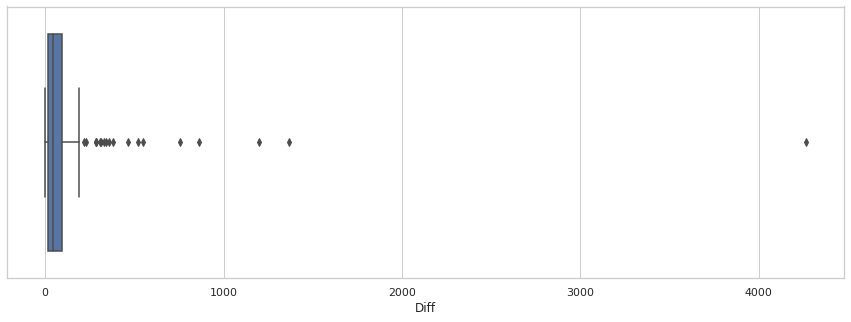

In [ ]:
sns.boxplot(diferencas.Diff);

#Conclusão final

O modelo ficou bom, ficando ineficiente apenas na questão dos outliers, uma tática que poderia ter usada seria transformar de alguma forma como log ou raiz quadrada para a variável target tentar controlar um pouco mais a dispersão dos dados. Acredito que dessa forma o resultado do nosso modelo teria sido muito mais positivo.